In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os


import pickle

In [2]:
datadir='/home/dell/Documents/pickle_image/Dataset'
categories=['Cat','Dog']

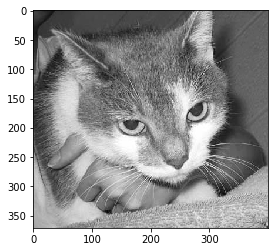

In [3]:
for category in categories:
    path=os.path.join(datadir,category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array,cmap='gray')
        plt.show()
        break
    break    

In [4]:
print(img_array)

[[ 81  80  79 ... 100 103 105]
 [ 82  81  80 ... 104 108 109]
 [ 83  83  82 ... 110 113 114]
 ...
 [166 168 171 ... 109  88  78]
 [167 168 171 ...  99  97 100]
 [167 168 170 ... 130  93  71]]


In [5]:
img_array=cv2.resize(img_array,(50,50))

In [6]:
img_array

array([[ 82,  73,  64, ..., 105, 115, 108],
       [ 77,  74,  58, ..., 113, 112, 107],
       [ 69,  62,  41, ..., 110, 109, 113],
       ...,
       [181, 184, 187, ..., 198, 186, 171],
       [177, 178, 181, ..., 159, 167, 149],
       [174, 177, 183, ..., 171, 149, 144]], dtype=uint8)

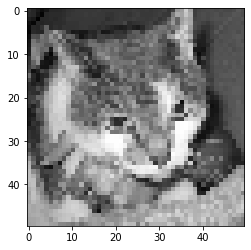

In [7]:
plt.imshow(img_array,cmap='gray')

In [8]:
training_data=[]

def create_training_data():
    for category in categories:
        path=os.path.join(datadir,category)
        class_num=categories.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                img_array=cv2.resize(img_array,(50,50))
                training_data.append([img_array,class_num])
            except Exception as e:
                pass
create_training_data()

In [9]:
print(training_data)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [10]:
import random
random.shuffle(training_data)

In [11]:
X=[]
y=[]

In [12]:
for features,label in training_data:
    X.append(features)
    y.append(label)
    
X=np.array(X).reshape(-1,50,50,1)    

In [13]:
X.shape

(25000, 50, 50, 1)

In [14]:
pickle_out=open('X.pickle','wb')
pickle.dump(X,pickle_out)
pickle_out.close()

pickle_out=open('y.pickle','wb')
pickle.dump(y,pickle_out)
pickle_out.close()


In [15]:
pickle_in=open('X.pickle','rb')
X=pickle.load(pickle_in)

In [16]:
X[1]

array([[[254],
        [254],
        [254],
        ...,
        [224],
        [233],
        [223]],

       [[254],
        [254],
        [254],
        ...,
        [187],
        [205],
        [215]],

       [[254],
        [254],
        [254],
        ...,
        [223],
        [197],
        [211]],

       ...,

       [[183],
        [191],
        [159],
        ...,
        [107],
        [203],
        [207]],

       [[155],
        [180],
        [222],
        ...,
        [190],
        [ 31],
        [161]],

       [[191],
        [166],
        [187],
        ...,
        [209],
        [224],
        [122]]], dtype=uint8)